In [1]:
import pandas as pd

file_path = r"C:\Users\lavan\OneDrive\Documents\ad_table.csv"  # Adjust the path as needed

try:
    data = pd.read_csv(file_path)
    print("File loaded successfully!")
    print(data.head())
except PermissionError:
    print("Permission Denied: Check if the file is open or if you have the correct permissions.")
except FileNotFoundError:
    print("File Not Found: Double-check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


File loaded successfully!
         date  shown  clicked  converted  avg_cost_per_click  total_revenue  \
0  2015-10-01  65877     2339         43                0.90         641.62   
1  2015-10-02  65100     2498         38                0.94         756.37   
2  2015-10-03  70658     2313         49                0.86         970.90   
3  2015-10-04  69809     2833         51                1.01         907.39   
4  2015-10-05  68186     2696         41                1.00         879.45   

           ad  
0  ad_group_1  
1  ad_group_1  
2  ad_group_1  
3  ad_group_1  
4  ad_group_1  


In [6]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
# Replace 'your_file.csv' with the path to your CSV file
file_path = r'C:\Users\lavan\OneDrive\Documents\ad_table.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check the data
print(data.head())

# Display basic information about the DataFrame
print(data.info())

# Optional: Check for missing values in the dataset
print(data.isnull().sum())

# Optional: Display basic statistics for numerical columns
print(data.describe())


         date  shown  clicked  converted  avg_cost_per_click  total_revenue  \
0  2015-10-01  65877     2339         43                0.90         641.62   
1  2015-10-02  65100     2498         38                0.94         756.37   
2  2015-10-03  70658     2313         49                0.86         970.90   
3  2015-10-04  69809     2833         51                1.01         907.39   
4  2015-10-05  68186     2696         41                1.00         879.45   

           ad  
0  ad_group_1  
1  ad_group_1  
2  ad_group_1  
3  ad_group_1  
4  ad_group_1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2115 non-null   object 
 1   shown               2115 non-null   int64  
 2   clicked             2115 non-null   int64  
 3   converted           2115 non-null   int64  
 4   avg_cost_per_click  2115

In [7]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [9]:
# Load dataset
data = pd.read_csv(r'C:\Users\lavan\OneDrive\Documents\ad_table.csv')

# Inspect data
print(data.head())
print(data.info())
print(data.describe())


         date  shown  clicked  converted  avg_cost_per_click  total_revenue  \
0  2015-10-01  65877     2339         43                0.90         641.62   
1  2015-10-02  65100     2498         38                0.94         756.37   
2  2015-10-03  70658     2313         49                0.86         970.90   
3  2015-10-04  69809     2833         51                1.01         907.39   
4  2015-10-05  68186     2696         41                1.00         879.45   

           ad  
0  ad_group_1  
1  ad_group_1  
2  ad_group_1  
3  ad_group_1  
4  ad_group_1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                2115 non-null   object 
 1   shown               2115 non-null   int64  
 2   clicked             2115 non-null   int64  
 3   converted           2115 non-null   int64  
 4   avg_cost_per_click  2115

In [10]:
# Check for missing values
print(data.isnull().sum())

# Handle missing values (impute or drop)
data = data.dropna()  # or use data.fillna() for imputation

# Check for duplicates
print(data.duplicated().sum())

# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Ensure correct data types
data['ad'] = data['ad'].astype('category')


date                  0
shown                 0
clicked               0
converted             0
avg_cost_per_click    0
total_revenue         0
ad                    0
dtype: int64
0


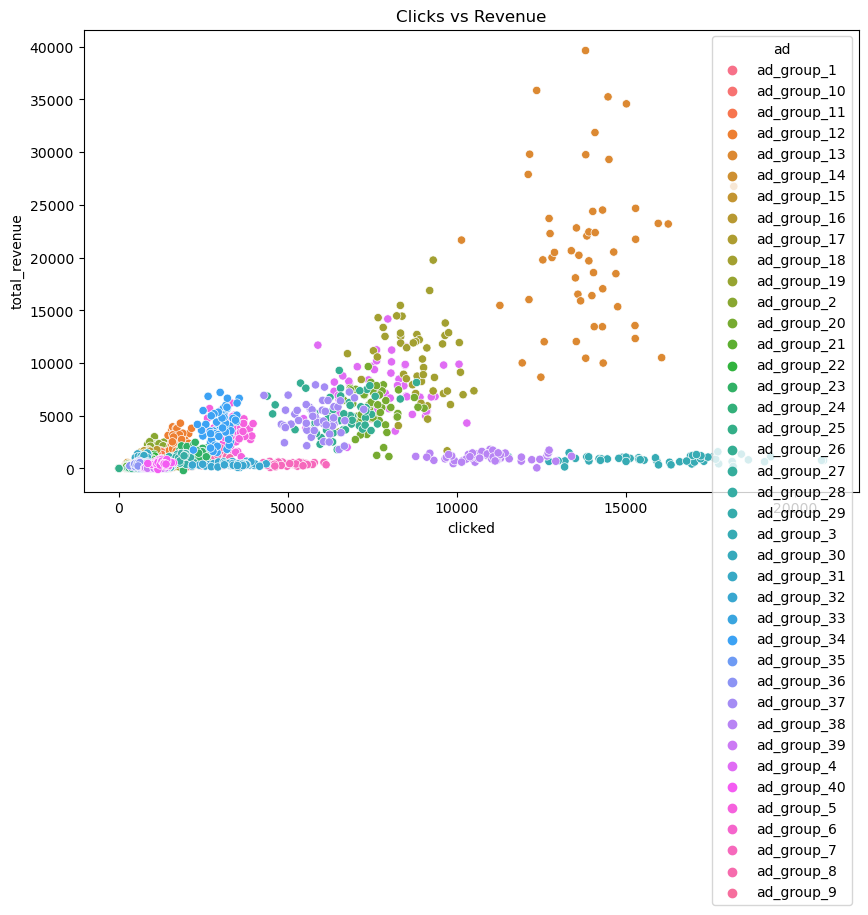

In [21]:
# Plot a scatter plot to analyze the relationship between clicks, conversions, and revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x='clicked', y='total_revenue', data=data, hue='ad')
plt.title('Clicks vs Revenue')
plt.show()


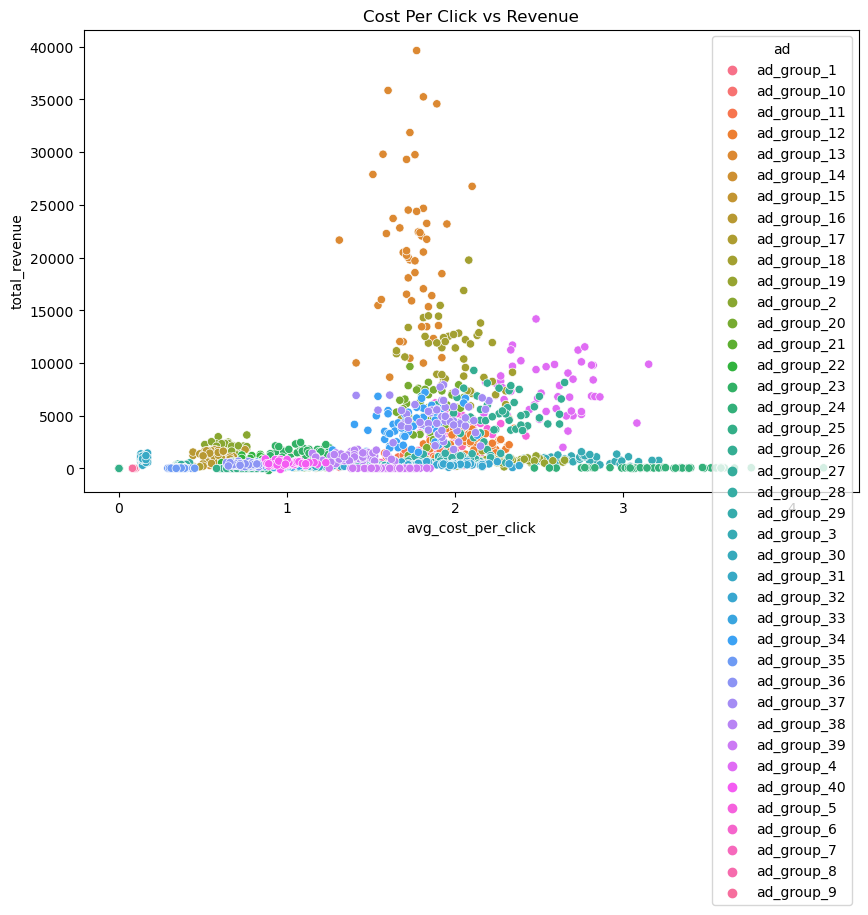

In [22]:
# Visualize the relationship between avg_cost_per_click and total_revenue
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg_cost_per_click', y='total_revenue', data=data, hue='ad')
plt.title('Cost Per Click vs Revenue')
plt.show()


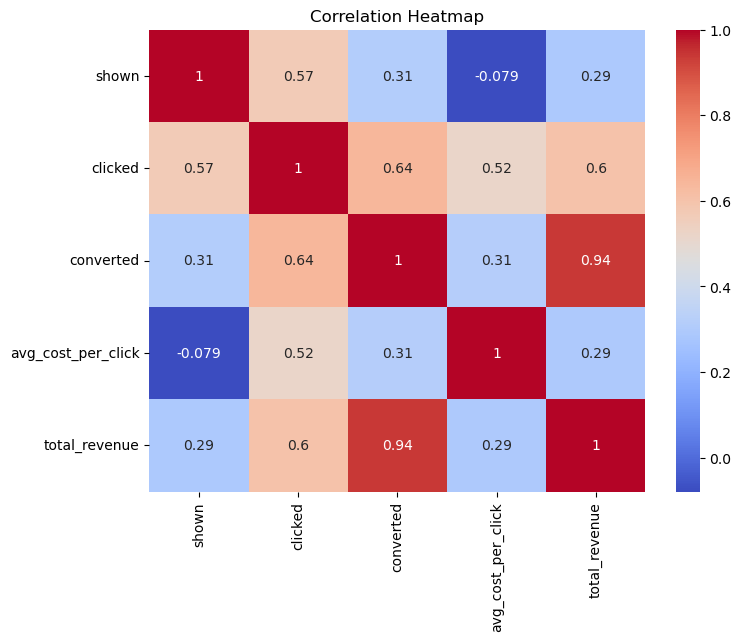

In [23]:
# Correlation heatmap to explore relationships between numeric variables
correlation_matrix = data[['shown', 'clicked', 'converted', 'avg_cost_per_click', 'total_revenue']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [83]:
# Create a new feature for conversion rate
data['conversion_rate'] = data['converted'] / data['clicked']

# Feature for Return on Ad Spend (ROAS)
data['roas'] = data['total_revenue'] / (data['clicked'] * data['avg_cost_per_click'])


In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load your dataset (replace 'ad_spend_data.csv' with your file name)
data = pd.read_csv(r"C:\Users\lavan\OneDrive\Documents\ad_table.csv")

# Step 1: Check for NaN values
print("Checking for NaN values in the dataset...")
print(data.isnull().sum())

# Step 2: Handle Missing Values

# Numerical columns: Fill with the mean
numerical_cols = ['shown', 'clicked', 'converted', 'avg_cost_per_click', 'total_revenue']
for col in numerical_cols:
    data[col] = data[col].fillna(data[col].mean())

# Categorical columns: Fill with the mode (if you have any)
categorical_cols = ['ad']
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])

# Step 3: Verify that NaN values are handled
print("After handling NaN values:")
print(data.isnull().sum())

# Step 4: Feature Engineering (if required)
# Create additional features, such as conversion rate
data['conversion_rate'] = data['converted'] / data['clicked']
data['conversion_rate'] = data['conversion_rate'].fillna(0)  # Fill any new NaN values with 0

# Step 5: Prepare Features (X) and Target (y)
# Assuming 'total_revenue' is the target variable
X = data[['shown', 'clicked', 'converted', 'avg_cost_per_click', 'conversion_rate']]
y = data['total_revenue']

# Step 6: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 7: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data is now preprocessed and ready for training!
print("Preprocessing complete. Data is ready for training.")


Checking for NaN values in the dataset...
date                  0
shown                 0
clicked               0
converted             0
avg_cost_per_click    0
total_revenue         0
ad                    0
dtype: int64
After handling NaN values:
date                  0
shown                 0
clicked               0
converted             0
avg_cost_per_click    0
total_revenue         0
ad                    0
dtype: int64
Preprocessing complete. Data is ready for training.


In [ ]:
#LINEAR REGRESSION

In [85]:
# Define features and target variable
X = data[['shown', 'clicked', 'avg_cost_per_click', 'conversion_rate']]
y = data['total_revenue']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [86]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [87]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 4647684.803718635
R-squared: 0.5486424534276682


In [88]:
# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                    Coefficient
shown                456.382827
clicked             1974.685250
avg_cost_per_click   256.486679
conversion_rate     1868.491257


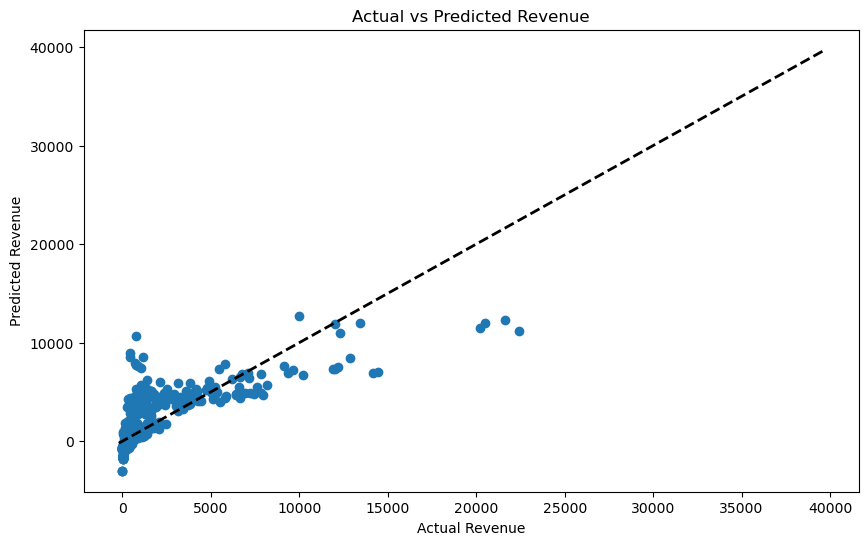

In [89]:
# Compare actual vs predicted revenue
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.show()


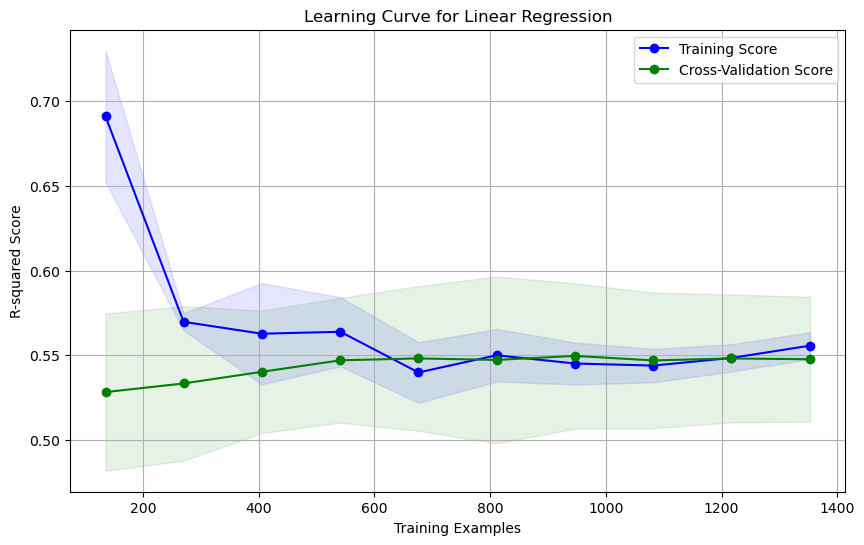

In [91]:
from sklearn.model_selection import learning_curve
import numpy as np

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    model,  # The trained linear regression model
    X_train_scaled,  # Scaled training features
    y_train,  # Training target
    cv=5,  # Number of cross-validation splits
    scoring='r2',  # Use R-squared for evaluation
    n_jobs=-1,  # Use all processors
    train_sizes=np.linspace(0.1, 1.0, 10)  # Training set fractions
)

# Calculate mean and standard deviation for train/test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Score')
plt.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color='blue',
)

plt.plot(train_sizes, test_scores_mean, 'o-', color='green', label='Cross-Validation Score')
plt.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color='green',
)

# Add titles and labels
plt.title('Learning Curve for Linear Regression')
plt.xlabel('Training Examples')
plt.ylabel('R-squared Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [92]:
from sklearn.metrics import mean_squared_error

# Baseline model: Predict the mean of the target values
baseline_prediction = np.mean(y_train)  # Using mean as the baseline
y_baseline = np.full_like(y_test, baseline_prediction)  # Same prediction for all test samples

# Predicted values from your trained model
y_pred = model.predict(X_test_scaled)

# Calculate Mean Squared Error for baseline and model
baseline_mse = mean_squared_error(y_test, y_baseline)
model_mse = mean_squared_error(y_test, y_pred)

# Percentage improvement
improvement_percent = ((baseline_mse - model_mse) / baseline_mse) * 100

# Display results
print(f"Baseline MSE: {baseline_mse:.2f}")
print(f"Model MSE: {model_mse:.2f}")
print(f"Percentage Improvement: {improvement_percent:.2f}%")


Baseline MSE: 10315971.89
Model MSE: 4647684.80
Percentage Improvement: 54.95%


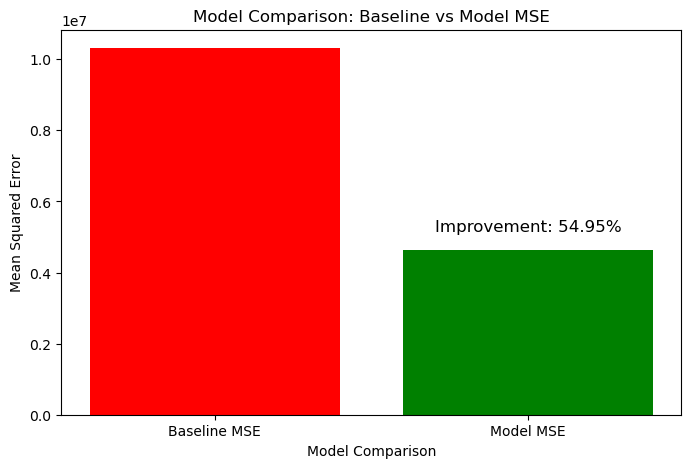

In [2]:
import matplotlib.pyplot as plt

# Define baseline MSE and model MSE
baseline_mse = 10315971.89
model_mse = 4647684.80

# Calculate the percentage improvement in MSE
percentage_improvement = ((baseline_mse - model_mse) / baseline_mse) * 100

# Plot the comparison of MSE values
mse_values = [baseline_mse, model_mse]
labels = ['Baseline MSE', 'Model MSE']

plt.figure(figsize=(8, 5))
plt.bar(labels, mse_values, color=['red', 'green'])

# Adding percentage improvement as text annotation on the bar plot
plt.text(1, model_mse + 500000, f'Improvement: {percentage_improvement:.2f}%', ha='center', fontsize=12)

plt.xlabel('Model Comparison')
plt.ylabel('Mean Squared Error')
plt.title('Model Comparison: Baseline vs Model MSE')

# Display the plot
plt.show()